In [1]:
library(tidyverse)
library(ggplot2)
library(patchwork)
source("helper.R")
library(pdftools)
library(scales)
library(xtable)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
sinfo_path = "../../output/sims_info.tsv"
sinfoh_path = "../../output/header_sims_info.tsv"

In [3]:
win_size = 1000000
chroms= c("chr12")
win_len = -1
padding = 0
rescf = 1
prop_acc=0.4

In [4]:
fig_prefixes = c("cor-pidxy-dT", "subset-chr12-landscapes","annot-correls-tmrca")
widths = c(100, 125, 100)
heights = c(25, 25, 35)
#fig_prefixes = c("annot-correls-tmrca")

In [5]:
sims_path = "../../output/sims_results/"
varmut_sims_path = "../../output/varmut/sims_results/"
pref = "cor-pidxy-pidxy"
data_path=paste0("../../output/greatapes-diversity-data/chr12/cor-pidxy-pidxy_win-size_",as.integer(win_size),"_merged-mask_True_state_all_curr_all_prop-acc_0.4.tsv")

In [6]:
# loading sims info table
sinfo = read.table(sinfo_path, sep="\t", fill=TRUE)
h = read.table(sinfoh_path, sep="\t", header=TRUE)
cnames = colnames(h)
if (length(sinfo) == length(h)+1) {
    cnames = c(cnames, "poscoefdecayeps")
}
colnames(sinfo) = cnames

In [7]:
#diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "rescf", "win_len", "padding", "chr")
diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "poscoefdecayeps", "rescf", "win_len", "padding", "chr")

In [8]:
wsize_str = paste0("win-size_",as.integer(win_size))

In [9]:
sims_folders = paste0(sims_path,list.files(sims_path)[grep(wsize_str, list.files(sims_path))])

In [10]:
varmut_sims_folders = paste0(varmut_sims_path,list.files(varmut_sims_path)[grep(wsize_str, list.files(varmut_sims_path))])

In [11]:
sims_folders = c(sims_folders, varmut_sims_folders)

In [12]:
sims_folders

[1] "../../output/sims_results/sup-rand-id_05UIN5L4C6DQVF36DK_rep_0_win-size_1000000_sample-size_10"                                                             
  [2] "../../output/sims_results/sup-rand-id_065F5BZPM54VISNQVD_rep_0_win-size_1000000_sample-size_10"                                                             
  [3] "../../output/sims_results/sup-rand-id_06SRXRZUBSHTPE7B45_rep_0_win-size_1000000_sample-size_10"                                                             
  [4] "../../output/sims_results/sup-rand-id_070BPKCBVLG5QXPWN3_rep_0_win-size_1000000_sample-size_10"                                                             
  [5] "../../output/sims_results/sup-rand-id_0ASPD1FD6L57DMLSWJ_rep_0_win-size_1000000_sample-size_10"                                                             
  [6] "../../output/sims_results/sup-rand-id_0HP3ZRYJ9RLRCLG2ZO_rep_0_win-size_1000000_sample-size_10"                                                             
  [7] "../../output/sims_results/sup-rand-id_0IS2O4A8NEMY0JHV23_rep_0_win-size_1000000_sample-size_10"                                                             
  [8] "../../output/sims_results/sup-rand-id_0M16DBTHD4JXN5WHLN_rep_0_win-size_1000000_sample-size_10"                                                             
  [9] "../../output/sims_results/sup-rand-id_0OLIX71HRPKIWAATL1_rep_0_win-size_1000000_sample-size_10"                                                             
 [10] "../../output/sims_results/sup-rand-id_0QLS10250XIC5XRZ3G_rep_0_win-size_1000000_sample-size_10"                                                             
 [11] "../../output/sims_results/sup-rand-id_0QSBURYR21TM7GJ663_rep_0_win-size_1000000_sample-size_10"                                                             
 [12] "../../output/sims_results/sup-rand-id_0SXD4NC1HECYSTFLHU_rep_0_win-size_1000000_sample-size_10"                                                             
 [13] "../../output/sims_results/sup-rand-id_0Z3EGDGE098SOOD5T6_rep_0_win-size_1000000_sample-size_10"                                                             
 [14] "../../output/sims_results/sup-rand-id_112HVHQ6DZ4PCWLUZD_rep_0_win-size_1000000_sample-size_10"                                                             
 [15] "../../output/sims_results/sup-rand-id_15FGIC4MY77IMS7VE6_rep_0_win-size_1000000_sample-size_10"                                                             
 [16] "../../output/sims_results/sup-rand-id_199TAXQN0155ROIACG_rep_0_win-size_1000000_sample-size_10"                                                             
 [17] "../../output/sims_results/sup-rand-id_1BZMPW90PHSECM8FPY_rep_0_win-size_1000000_sample-size_10"                                                             
 [18] "../../output/sims_results/sup-rand-id_1HFRSS55CGP54VA583_rep_0_win-size_1000000_sample-size_10"                                                             
 [19] "../../output/sims_results/sup-rand-id_1I2WB69HCCAMVULG7Q_rep_0_win-size_1000000_sample-size_10"                                                             
 [20] "../../output/sims_results/sup-rand-id_1KI457ZVV7DVS1O58U_rep_0_win-size_1000000_sample-size_10"                                                             
 [21] "../../output/sims_results/sup-rand-id_1LK1X2CYQUGS8MA9U6_rep_0_win-size_1000000_sample-size_10"                                                             
 [22] "../../output/sims_results/sup-rand-id_1PHX8DNP08370681KN_rep_0_win-size_1000000_sample-size_10"                                                             
 [23] "../../output/sims_results/sup-rand-id_1TRVVV3G18G1VCU5Y2_rep_0_win-size_1000000_sample-size_10"                                                             
 [24] "../../output/sims_results/sup-rand-id_1UKUNUINCNKWC50BSM_rep_0_win-size_1000000_sample-size_10"                                                             
 [25] "../../output/sims_results/sup-rand-id_1ZTIP09L94JNZTP6P1_re

In [13]:
simresults = as.data.frame(do.call(rbind, lapply(X = sims_folders, function(x) unlist(meta_from_fname(x,prop=prop_acc,suffix="$")))), stringsAsFactors =FALSE)

[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"
[1] "entrei"


In [14]:
simresults$folderpath = sims_folders

In [15]:
tmp = unique(sinfo[sinfo$sup_rand_id %in% simresults$sup_rand_id,c(diff_cols,"sup_rand_id")])

In [16]:
simresults = left_join(simresults, tmp)
simresults$posrate[is.na(simresults$posrate)] = 0

Joining, by = "sup_rand_id"



In [17]:
simresults = simresults[simresults$win_len==win_len &
                        simresults$padding == padding &
                        simresults$rescf==1 &
                        as.numeric(simresults$win_size) == win_size &
                        simresults$chr %in% chroms &
                        simresults$posrate <= 1.8e-11,]

In [18]:
simresults[is.na(simresults$poscoefdecayeps),]$poscoefdecayeps = 0

In [19]:
simresults$selregime = ifelse(simresults$posrate<1e-16,ifelse(simresults$delrate<1e-16, ifelse(simresults$sigma==0, "neutral", "varmut"), "del_only"), ifelse(simresults$delrate<1e-16, "pos_only", "both"))

In [20]:
colnames(simresults)

[1] "win_size"        "sup_rand_id"     "rep"             "sample_size"    
 [5] "spaced_desc"     "desc"            "prop"            "is_ga_data"     
 [9] "sigma"           "state"           "folderpath"      "delrate"        
[13] "delcoef"         "posrate"         "poscoef"         "mu"             
[17] "poscoefdecayeps" "rescf"           "win_len"         "padding"        
[21] "chr"             "selregime"

In [21]:
blah = unique(simresults[,c("delrate", "posrate", "delcoef","poscoef","selregime","sigma")])

In [22]:
blah$sigma

[1] "0"     "0"     "0"     "0"     "0"     "0"     "0"     "0"     "0"    
[10] "0"     "0"     "0"     "0"     "0"     "0"     "0"     "0"     "0"    
[19] "0"     "0"     "0"     "0"     "0"     "0"     "0"     "0"     "0.005"
[28] "0.007" "0.011" "0.016" "0.023" "0.033" "0.048" "0.070" "0.103" "0.150"
[37] "0.005" "0.007" "0.011" "0.016" "0.023" "0.033" "0.048" "0.070" "0.103"
[46] "0.150" "0.005" "0.007" "0.011" "0.016" "0.023" "0.033" "0.048" "0.070"
[55] "0.103" "0.150"

In [23]:
blah = blah[order(blah$delrate, blah$delcoef, blah$posrate, blah$poscoef, blah$sigma),]
blah

,delrate,posrate,delcoef,poscoef,selregime,sigma
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
97,0.0e+00,0e+00,0.000,0.000,neutral,0
409,0.0e+00,0e+00,0.000,0.000,varmut,0.005
410,0.0e+00,0e+00,0.000,0.000,varmut,0.007
411,0.0e+00,0e+00,0.000,0.000,varmut,0.011
412,0.0e+00,0e+00,0.000,0.000,varmut,0.016
413,0.0e+00,0e+00,0.000,0.000,varmut,0.023
414,0.0e+00,0e+00,0.000,0.000,varmut,0.033
415,0.0e+00,0e+00,0.000,0.000,varmut,0.048
416,0.0e+00,0e+00,0.000,0.000,varmut,0.070


In [24]:
tab<-xtable(blah, 
            caption= "Simulation parameters", digits=-3, auto=TRUE)

In [25]:
print(tab, include.rownames=F, display=c('f','f','f','f','f','s','f'), math.style.exponents = T)

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Fri Sep 29 09:56:51 2023
\begin{table}[ht]
\centering
\begin{tabular}{rrrrll}
  \hline
delrate & posrate & delcoef & poscoef & selregime & sigma \\ 
  \hline
$0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & neutral & 0 \\ 
  $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & varmut & 0.005 \\ 
  $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & varmut & 0.007 \\ 
  $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & varmut & 0.011 \\ 
  $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & varmut & 0.016 \\ 
  $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & varmut & 0.023 \\ 
  $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \times 10^{0}$ & $0.000 \ti

In [26]:
simresults$seldesc = apply(
    simresults,
    1,
    function(x) paste("mu-D=", x["delrate"],
                      " mu-B=", x["posrate"],
                      ifelse(x["sigma"]>0, paste0("\nmut-sd=", x['sigma']),""),
                      ifelse(x['selregime'] %in% c("del_only", "both"), paste0("\ncoef-D=", x["delcoef"]), ""),
                      ifelse(x['selregime'] %in% c("both", "pos_only"), paste0("\ncoef-B=", x["poscoef"], " decay-B=", format(as.numeric(x["poscoefdecayeps"]),nsmall=3)), ""),
                      "\n(", x["sup_rand_id"], ")", 
                      sep=""))
simresults$seldesc_norandid = apply(
    simresults,
    1,
    function(x) paste("mu-D=", x["delrate"],
                      " mu-B=", x["posrate"],
                      ifelse(x["sigma"]>0, paste0("\nmut-sd=", x['sigma']),""), 
                      ifelse(x['selregime'] %in% c("del_only", "both"), paste0("\ncoef-D=", x["delcoef"]), ""),
                      ifelse(x['selregime'] %in% c("both", "pos_only"), paste0("\ncoef-B=", x["poscoef"], " decay-B=", format(as.numeric(x["poscoefdecayeps"]),nsmall=3)), ""),
                      sep=""))

In [27]:
format('0',nsmall=3)

[1] "0"

In [28]:
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "\n", " ")
simresults$seldesc_norandid = str_replace(simresults$seldesc_norandid, " \\(.+$", "")
simresults$seldesc_norandid = str_replace(simresults$seldesc_norandid, " coef-.+$", "")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "mu-D=0.0e\\+00", "")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "mu-B=0e\\+00", "")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "data", "Data")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "mu", "\\u03bc")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "-D", "\\u2099")
simresults$seldesc_norandid = str_replace_all(simresults$seldesc_norandid, "-B", "\\u209a")
simresults$seldesc_norandid = str_replace(simresults$seldesc_norandid, "\\u03bct", "\\u03bc")

In [29]:
simresults$sigma = as.numeric(simresults$sigma)

In [30]:
tmp = simresults
ordered = c("neutral", "del_only", "pos_only", "both", "varmut")
classes = unique(tmp$selregime)
tmp$selregime = factor(tmp$selregime, levels=classes[order(match(classes,ordered))])
tmp = tmp[
  with(tmp, order(selregime,posrate,-poscoefdecayeps,delrate,poscoef,delcoef,sigma)),
]
simresults=tmp

In [31]:
simresults$poscoefdecayeps

[1] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[13] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.010 0.001
[25] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
[37] 0.000 0.000 0.000 0.000 0.010 0.001 0.000 0.000 0.000 0.000 0.000 0.000
[49] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000

In [32]:
simresults[simresults$sup_rand_id == "4GROMS6FHMNW5X9L72",]

,win_size,sup_rand_id,rep,sample_size,spaced_desc,desc,prop,is_ga_data,sigma,state,⋯,poscoef,mu,poscoefdecayeps,rescf,win_len,padding,chr,selregime,seldesc,seldesc_norandid
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<chr>,<chr>
45,1000000,4GROMS6FHMNW5X9L72,0,10,sup-rand-id=4GROMS6FHMNW5X9L72 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_4GROMS6FHMNW5X9L72_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,0,all,⋯,0.01,1e-11,0,1,-1,0,chr12,pos_only,mu-D=0.0e+00 mu-B=1e-11 coef-B=0.010 decay-B=0.000 (4GROMS6FHMNW5X9L72),μₚ=1e-11


In [33]:
data_row = simresults[1,]
data_row$sup_rand_id="data"
data_row$spaced_desc="data"
data_row$desc="data"
data_row$is_ga_data=TRUE
data_row$sigma=0
data_row$state="all"
data_row$folderpath = data_path
data_row$delrate=0
data_row$delcoef=0
data_row$posrate=0
data_row$poscoef=0
data_row$mu=0
data_row$poscoefdecayeps=0.000
data_row$rescf=0
data_row$win_len=0
data_row$padding=0
data_row$selregime="data"
data_row$seldesc="data"
data_row$chr = "chr12"

In [34]:

a = apply(simresults,1, function(x) read.table(paste0(x["folderpath"],
                                             "/",pref, "_",x["desc"],".tsv"), sep="\t", header=TRUE))

In [35]:
data_df = read.table(data_row$folderpath,sep="\t",header=TRUE)
#data_df = data_df[data_df$chr %in% chroms,] # getting only chroms of interest

In [36]:

simresults = rbind(simresults,data_row)

In [37]:
a = append(a,list(data_df))

In [38]:
length(a)

[1] 61

In [39]:
names(a) = simresults$desc

In [40]:
a = bind_rows(a, .id="id")

In [41]:
a = left_join(a, simresults, by=c("id"="desc"))

In [42]:
a[,c("spp1_1", "spp2_1")] = t(apply(a[,c("spp1_1", "spp2_1")], 1, sort))
a[,c("spp1_2", "spp2_2")] = t(apply(a[,c("spp1_2", "spp2_2")], 1, sort))

a$spp1 = paste(a$spp1_1, a$spp2_1, sep="_")
a$spp2 = paste(a$spp1_2, a$spp2_2, sep="_")
a[,c("spp1", "spp2")] = t(apply(a[,c("spp1", "spp2")], 1, sort))
a$poscoefdecayeps = format(a$poscoefdecayeps,nsmall=3)

Warning message:
“Removed 2207 rows containing non-finite values (stat_smooth).”


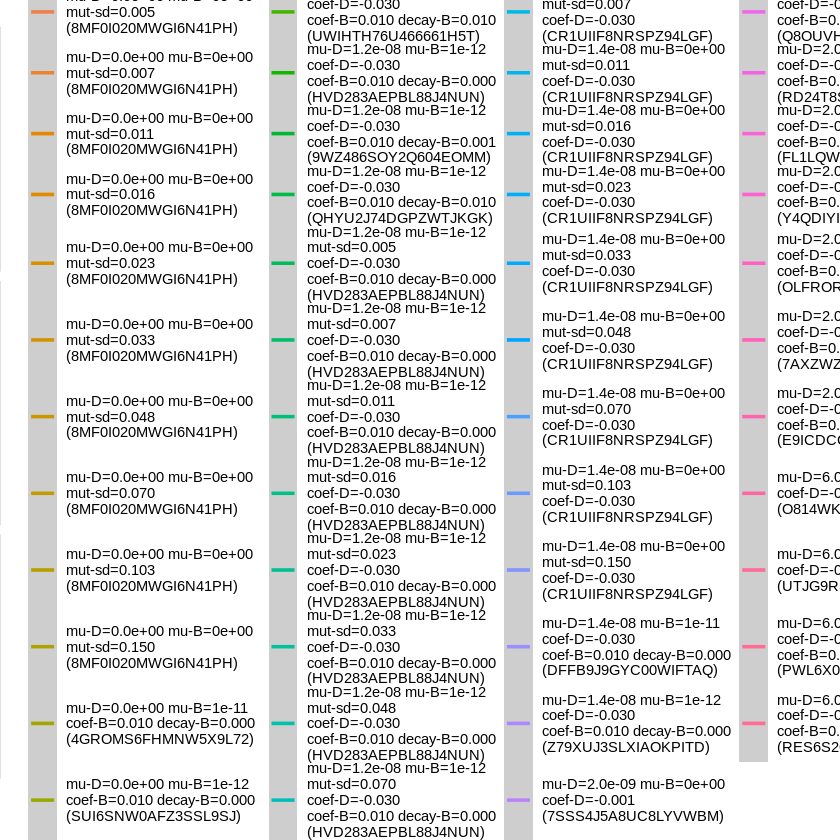

In [43]:
statcombolabs = c(`dxy_dxy`="d[XY]-d[XY]", `dxy_pi`="d[XY]-pi", `pi_pi`="pi-pi")
lownelabs = c(`TRUE`="Yes", `False`="No")
p_dt = ggplot(a[a$has_shared == FALSE,], aes(y=value, x=dt, col=seldesc)) +
    geom_smooth(formula = y ~ I(log(x)), method="lm") +
    scale_shape_manual(values=c(19, 18), labels=c("No", "Yes")) +
    scale_x_continuous(labels = label_number(scale = 1e-3)) +
    #scale_color_viridis_d(direction=-1, end=0.7) +
    facet_grid(factor(statcombo, levels=c("pi_pi", "dxy_pi", "dxy_dxy"))~selregime, scales="free", labeller=as_labeller(statcombolabs, default=label_parsed)) +
    labs(x=bquote("dT ("*10^3*")"), y="Correlation between landscapes", shape=bquote(pi*" in low "*N[e]*" species?"), col="Number of species involved\nin the comparison") +
    ylim(0,1) +
    guides(colour = guide_legend(title.position="top"), shape = guide_legend(title.position="top"))

p_dt

In [44]:
wide_a = a[,c("id","spp1", "spp2", "selregime", "seldesc", "seldesc_norandid", "value")] %>%
    pivot_wider(id_cols=c("id","selregime","seldesc", "seldesc_norandid"),
                names_from=c("spp1", "spp2"),
                values_from=c("value"),
                names_sep="__") %>%
    ungroup()

In [45]:
corrs_pca <- prcomp(select(wide_a,-c("id","selregime","seldesc", "seldesc_norandid")), center = TRUE,scale. = TRUE)


In [46]:
components <- corrs_pca[["x"]]
components <- data.frame(components)
components <- cbind(components, wide_a$selregime)
components <- cbind(components, wide_a$seldesc)
props = round(summary(corrs_pca)[[6]][2,]*100,2)

In [47]:
library(ggfortify)

In [48]:
wide_a$selregime = factor(wide_a$selregime, levels=c("data", "neutral", "del_only", "pos_only", "both", "varmut"), labels=c("Empirical data", "Neutral", "Deleterious", "Positive", "Both", "Neutral"))


In [49]:
pcadf <- data.frame(selregime = wide_a$selregime,
                                       PC1 = corrs_pca$x[,1],
                                       PC2 = corrs_pca$x[,2])

In [50]:
wide_a$seldesc

[1] "mu-D=0.0e+00 mu-B=0e+00\n(8MF0I020MWGI6N41PH)"                                                         
 [2] "mu-D=2.0e-09 mu-B=0e+00\ncoef-D=-0.030\n(RNX4L54J663QN2SY5X)"                                          
 [3] "mu-D=2.0e-09 mu-B=0e+00\ncoef-D=-0.015\n(SIN0QA3J1CBIYBO7D7)"                                          
 [4] "mu-D=2.0e-09 mu-B=0e+00\ncoef-D=-0.010\n(X8JGYYPE1UYOV5FKVX)"                                          
 [5] "mu-D=2.0e-09 mu-B=0e+00\ncoef-D=-0.003\n(9K3JUI0WI4MAE1TJMJ)"                                          
 [6] "mu-D=2.0e-09 mu-B=0e+00\ncoef-D=-0.001\n(7SSS4J5A8UC8LYVWBM)"                                          
 [7] "mu-D=6.0e-09 mu-B=0e+00\ncoef-D=-0.030\n(UTJG9R531BVSR6UA41)"                                          
 [8] "mu-D=6.0e-09 mu-B=0e+00\ncoef-D=-0.015\n(O814WK8MN3UOF27JIR)"                                          
 [9] "mu-D=1.2e-08 mu-B=0e+00\ncoef-D=-0.030\n(AA9GUSRHWOA341WGC4)"                                          
[10] "mu-D=1.4e-08 mu-B=0e+00\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                                          
[11] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.005\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[12] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.007\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[13] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.011\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[14] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.016\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[15] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.023\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[16] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.033\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[17] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.048\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[18] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.070\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[19] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.103\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[20] "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.150\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)"                            
[21] "mu-D=0.0e+00 mu-B=1e-12\ncoef-B=0.010 decay-B=0.000\n(SUI6SNW0AFZ3SSL9SJ)"                             
[22] "mu-D=0.0e+00 mu-B=1e-11\ncoef-B=0.010 decay-B=0.000\n(4GROMS6FHMNW5X9L72)"                             
[23] "mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.010\n(QHYU2J74DGPZWTJKGK)"              
[24] "mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.001\n(9WZ486SOY2Q604EOMM)"              
[25] "mu-D=2.0e-09 mu-B=1e-12\ncoef-D=-0.010\ncoef-B=0.005 decay-B=0.000\n(7AXZWZ58S0N6AEPW66)"              
[26] "mu-D=2.0e-09 mu-B=1e-12\ncoef-D=-0.003\ncoef-B=0.005 decay-B=0.000\n(Y4QDIYISDRXNWCB4HV)"              
[27] "mu-D=2.0e-09 mu-B=1e-12\ncoef-D=-0.010\ncoef-B=0.010 decay-B=0.000\n(E9ICDCC0XKXBUAR8I4)"              
[28] "mu-D=2.0e-09 mu-B=1e-12\ncoef-D=-0.003\ncoef-B=0.010 decay-B=0.000\n(OLFRORNB6W0091FLBD)"              
[29] "mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)"              
[30] "mu-D=1.2e-08 mu-B=1e-12\nmut-sd=0.005\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)"
[31] "mu-D=1.2e-08 mu-B=1e-12\nmut-sd=0.007\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)"
[32] "mu-D=1.2e-08 mu-B=1e-12\nmut-sd=0.011\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)"
[33] "mu-D=1.2e-08 mu-B=1e-12\nmut-sd=0.016\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)"
[34] "mu-D=1.2e-08 mu-B=1e-12\nmut-sd=0.023\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)"
[35] "mu-D=1.2e-08 mu-B=1e-12\nmut-sd=0.033\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)"
[36] "mu-D=1.2e-08 mu-B=1e-12\nmut-sd=0.048\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)"
[37] "mu-D=1.2e-08 mu-B=1e-12\nmut-sd=0.0

In [51]:
if(win_size==5000000) {
    selected_points = c("mu-D=0.0e+00 mu-B=0e+00\n(8MF0I020MWGI6N41PH)",
                    "data",
                    "mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)", 
                    "mu-D=1.4e-08 mu-B=0e+00\nmut-sd=0.033\ncoef-D=-0.030\n(CR1UIIF8NRSPZ94LGF)", 
                    "mu-D=2.0e-09 mu-B=1e-12\ncoef-D=-0.010\ncoef-B=0.010 decay-B=0.000\n(E9ICDCC0XKXBUAR8I4)", 
                    "mu-D=0.0e+00 mu-B=1e-12\ncoef-B=0.010 decay-B=0.000\n(SUI6SNW0AFZ3SSL9SJ)", 
                    "mu-D=0.0e+00 mu-B=0e+00\nmut-sd=0.033\n(8MF0I020MWGI6N41PH)")
} else if (win_size==500000) {
    selected_points = c("mu-D=0.0e+00 mu-B=0e+00\n(8MF0I020MWGI6N41PH)",
                    "data",
                    "mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)", 
                    "mu-D=1.4e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(Z79XUJ3SLXIAOKPITD)", 
                    "mu-D=0.0e+00 mu-B=1e-11\ncoef-B=0.010 decay-B=0.000\n(4GROMS6FHMNW5X9L72)", 
                    "mu-D=0.0e+00 mu-B=1e-12\ncoef-B=0.010 decay-B=0.000\n(SUI6SNW0AFZ3SSL9SJ)", 
                    "mu-D=0.0e+00 mu-B=0e+00\nmut-sd=0.103\n(8MF0I020MWGI6N41PH)") 
} else {
   selected_points = c("mu-D=0.0e+00 mu-B=0e+00\n(8MF0I020MWGI6N41PH)",
                    "data",
                    "mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(HVD283AEPBL88J4NUN)", 
                    "mu-D=1.4e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0.000\n(Z79XUJ3SLXIAOKPITD)", 
                    "mu-D=0.0e+00 mu-B=1e-11\ncoef-B=0.010 decay-B=0.000\n(4GROMS6FHMNW5X9L72)", 
                    "mu-D=0.0e+00 mu-B=1e-12\ncoef-B=0.010 decay-B=0.000\n(SUI6SNW0AFZ3SSL9SJ)", 
                    "mu-D=0.0e+00 mu-B=0e+00\nmut-sd=0.070\n(8MF0I020MWGI6N41PH)") 
}


In [52]:
pcadf$seldesc_norandid = wide_a$seldesc_norandid
pcadf$seldesc = wide_a$seldesc
pcadf$mrv = grepl("sd", pcadf$seldesc)

In [53]:
pcadf %>% arrange(PC1, PC2)

selregime,PC1,PC2,seldesc_norandid,seldesc,mrv
<fct>,<dbl>,<dbl>,<chr>,<chr>,<lgl>
Neutral,-75.6173397,-15.8110493,,mu-D=0.0e+00 mu-B=0e+00 (8MF0I020MWGI6N41PH),FALSE
Deleterious,-71.0617382,-12.8004659,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.030 (RNX4L54J663QN2SY5X),FALSE
Deleterious,-69.7278515,-20.1262324,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.015 (SIN0QA3J1CBIYBO7D7),FALSE
Deleterious,-68.7965371,-4.3344008,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.010 (X8JGYYPE1UYOV5FKVX),FALSE
Deleterious,-68.1322636,-13.0374676,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.003 (9K3JUI0WI4MAE1TJMJ),FALSE
Neutral,-65.0442996,-4.0832557,μ-sd=0.005,mu-D=0.0e+00 mu-B=0e+00 mut-sd=0.005 (8MF0I020MWGI6N41PH),TRUE
Deleterious,-63.8538802,-6.1533854,μₙ=2.0e-09,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.001 (7SSS4J5A8UC8LYVWBM),FALSE
Neutral,-61.6885267,-3.4217946,μ-sd=0.007,mu-D=0.0e+00 mu-B=0e+00 mut-sd=0.007 (8MF0I020MWGI6N41PH),TRUE
Deleterious,-54.5128900,-4.7429567,μₙ=6.0e-09,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.030 (UTJG9R531BVSR6UA41),FALSE


In [54]:
pcadf$mrv = factor(pcadf$mrv, levels=c("FALSE", "TRUE"), labels=c("Constant","Local variation"))

In [55]:
pcadf[!pcadf$seldesc %in% selected_points,]$seldesc_norandid = ""


In [56]:
pcadf[pcadf$seldesc_norandid == " ",]$seldesc_norandid = as.character(pcadf[pcadf$seldesc_norandid == " ",]$selregime)

In [57]:
selected_points == 'mu-D=1.2e-08 mu-B=1e-12\ncoef-D=-0.030\ncoef-B=0.010 decay-B=0\n(HVD283AEPBL88J4NUN)'

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [58]:
library(ggrepel)

In [59]:
cols6 = c("#b3943f",
"#9565c8",
"#62a85b",
"#c85b8e",
"#6295cd",
"#cc5c42")
pcap = ggplot(pcadf, aes(x=PC1,y=PC2, col=selregime, shape=mrv, label=seldesc_norandid)) + 
    geom_point(size=2) + 
    scale_colour_manual(values=cols6) + 
    labs(col="Regime", x=paste0("PC1 ","(",props["PC1"],"%)"), y=paste0("PC2 ","(",props["PC2"],"%)"),shape="Mutation rate") + 
    theme_bw(base_size=18) + 
    geom_text_repel(max.time=10, show.legend = FALSE)# +
    #theme(legend.position="top")

ggsave(paste0("../../output/final_figs/pca_",win_size,".pdf"), width=8, height=6, device=cairo_pdf)

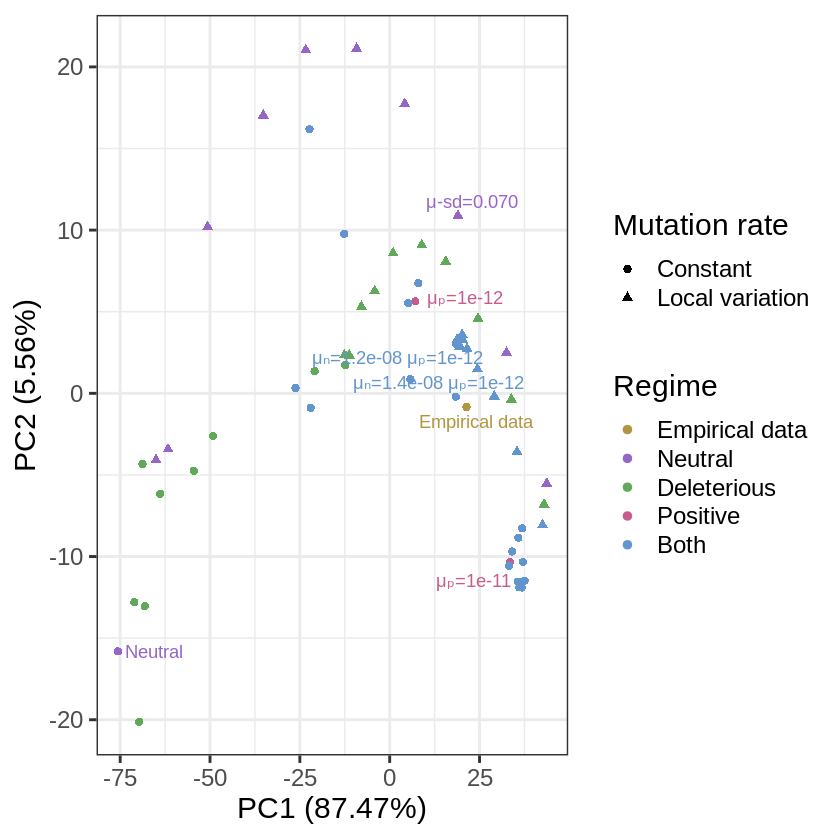

In [60]:
pcap

In [61]:
wide_a

id,selregime,seldesc,seldesc_norandid,bornean-orangutan_bornean-orangutan__bornean-orangutan_sumatran-orangutan,bornean-orangutan_bornean-orangutan__sumatran-orangutan_sumatran-orangutan,bornean-orangutan_bornean-orangutan__bornean-orangutan_eastern-gorilla,bornean-orangutan_bornean-orangutan__eastern-gorilla_sumatran-orangutan,bornean-orangutan_bornean-orangutan__eastern-gorilla_eastern-gorilla,bornean-orangutan_bornean-orangutan__bornean-orangutan_western-gorilla,⋯,bonobo_central-chimp__central-chimp_nigerian-chimp,bonobo_central-chimp__central-chimp_western-chimp,bonobo_central-chimp__central-chimp_eastern-chimp,bonobo_central-chimp__central-chimp_central-chimp,central-chimp_nigerian-chimp__central-chimp_western-chimp,central-chimp_eastern-chimp__central-chimp_nigerian-chimp,central-chimp_central-chimp__central-chimp_nigerian-chimp,central-chimp_eastern-chimp__central-chimp_western-chimp,central-chimp_central-chimp__central-chimp_western-chimp,central-chimp_central-chimp__central-chimp_eastern-chimp
<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sup-rand-id_8MF0I020MWGI6N41PH_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Neutral,mu-D=0.0e+00 mu-B=0e+00 (8MF0I020MWGI6N41PH),,0.3302375,0.09893153,0.151174258,0.12668208,0.05363861,0.151351662,⋯,0.2837733,0.3046652,0.08777322,0.09727998,0.8060192,0.5783056,0.6007889,0.5402942,0.5630906,0.8160843
sup-rand-id_RNX4L54J663QN2SY5X_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.030 (RNX4L54J663QN2SY5X),μₙ=2.0e-09,0.2508388,0.20081632,0.142846707,0.17154962,-0.07933087,0.149160201,⋯,0.3531591,0.3526112,0.25598347,0.27706917,0.8256589,0.6847480,0.6192510,0.5493105,0.5031737,0.8973481
sup-rand-id_SIN0QA3J1CBIYBO7D7_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.015 (SIN0QA3J1CBIYBO7D7),μₙ=2.0e-09,0.3411687,0.08526869,0.228814576,0.24169723,-0.03405634,0.206727784,⋯,0.4201134,0.3514998,0.36447121,0.42090187,0.8241457,0.5267436,0.5086987,0.5848539,0.5776411,0.8504131
sup-rand-id_X8JGYYPE1UYOV5FKVX_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.010 (X8JGYYPE1UYOV5FKVX),μₙ=2.0e-09,0.2871126,-0.05169238,0.204176298,0.20924796,-0.04691036,0.216636317,⋯,0.1451530,0.1204155,0.14766270,0.11233323,0.8325463,0.5367148,0.4994913,0.6018794,0.5503801,0.8266189
sup-rand-id_9K3JUI0WI4MAE1TJMJ_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.003 (9K3JUI0WI4MAE1TJMJ),μₙ=2.0e-09,0.1535118,0.11642411,-0.098213960,-0.09656515,0.01464626,-0.098010467,⋯,0.5095459,0.5381653,0.40285307,0.39398809,0.8760312,0.6020881,0.6028291,0.5932023,0.5936406,0.8498849
sup-rand-id_7SSS4J5A8UC8LYVWBM_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=2.0e-09 mu-B=0e+00 coef-D=-0.001 (7SSS4J5A8UC8LYVWBM),μₙ=2.0e-09,0.1920293,0.21532144,-0.006057823,-0.02232159,-0.11318372,-0.009882444,⋯,0.1455808,0.1046944,0.19639139,0.17954869,0.8550714,0.5897116,0.5343753,0.6428076,0.5583197,0.8417489
sup-rand-id_UTJG9R531BVSR6UA41_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.030 (UTJG9R531BVSR6UA41),μₙ=6.0e-09,0.2230855,0.16687473,0.141912728,0.14398418,-0.01613854,0.147793147,⋯,0.2632675,0.1934486,0.47570932,0.34374103,0.8411035,0.6669067,0.6553146,0.6327042,0.6410492,0.8919126
sup-rand-id_O814WK8MN3UOF27JIR_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=6.0e-09 mu-B=0e+00 coef-D=-0.015 (O814WK8MN3UOF27JIR),μₙ=6.0e-09,0.2133335,0.19343292,0.265725034,0.22831889,0.06600992,0.263418783,⋯,0.2456366,0.3254319,0.40835260,0.36166405,0.7990118,0.6096226,0.5636593,0.5877654,0.5055543,0.8277303
sup-rand-id_AA9GUSRHWOA341WGC4_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,Deleterious,mu-D=1.2e-08 mu-B=0e+00 coef-D=-0.030 (AA9GUSRHWOA341WGC4),μₙ=1.2e-08,0.4239224,0.37793875,0.272367247